# Analyses post scrapping

Objectifs :
- on veut surveiller le nombre de concurrents
- ceux qui arrivent à vendre
- ceux qui changent de stratégie

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import datetime

In [2]:
villes = ['Arcueil', 'Bourg-la-Reine', 'Cachan']
df = pickle.load(open('tous_les_logements.p', 'rb')).drop('texte', axis=1)
df = df[df.ville.isin(villes)].copy()

# Cet exemple montre qu'on a des doublons parfaits :
df[(df.description == 'Summer 2023 Cheerful 3-bedroom family home')]
clé = ['type', 'ville', 'description']
# Validation de la clé :
df = df.drop_duplicates(['date_enregistrement'] + clé)

# À une date d'enregistrement donné, ce qui fait l'unicité d'un logement est la combinaison
# de variables suivantes :
test = df.groupby(['date_enregistrement'] + clé).prix.nunique()
assert (test != 1).sum() == 0

print(df.shape)
df.tail(2)

(489, 11)


,date_enregistrement,type,ville,description,prix,note,nb_avis,nb_lits,nb_chambres,est_professionnel,est_nouveau
1102,2024-02-24,Hébergement,Cachan,Maison proche Paris avec jardin,1105,NaN,NaN,5.0,3.0,False,False
1103,2024-02-24,Chambre,Arcueil,Séjournez chez Virginie Et François,896,4.93,30.0,NaN,NaN,False,False


In [4]:
# Nombre de concurrents
df.groupby(['date_enregistrement', 'ville']).date_enregistrement.count().to_frame().unstack().T

date_enregistrement                 2023-12-20  2023-12-25  2024-01-06  \
                    ville                                                
date_enregistrement Arcueil                  6          15          17   
                    Bourg-la-Reine           8          10           7   
                    Cachan                  34          32          34   

date_enregistrement                 2024-01-13  2024-01-25  2024-01-31  \
                    ville                                                
date_enregistrement Arcueil                  6          15          16   
                    Bourg-la-Reine           5           6           7   
                    Cachan                  40          34          39   

date_enregistrement                 2024-02-10  2024-02-18  2024-02-24  
                    ville                                               
date_enregistrement Arcueil                 20           9           6  
                    Bourg-la-Reine           6           1           2  
                    Cachan                  38          38          38

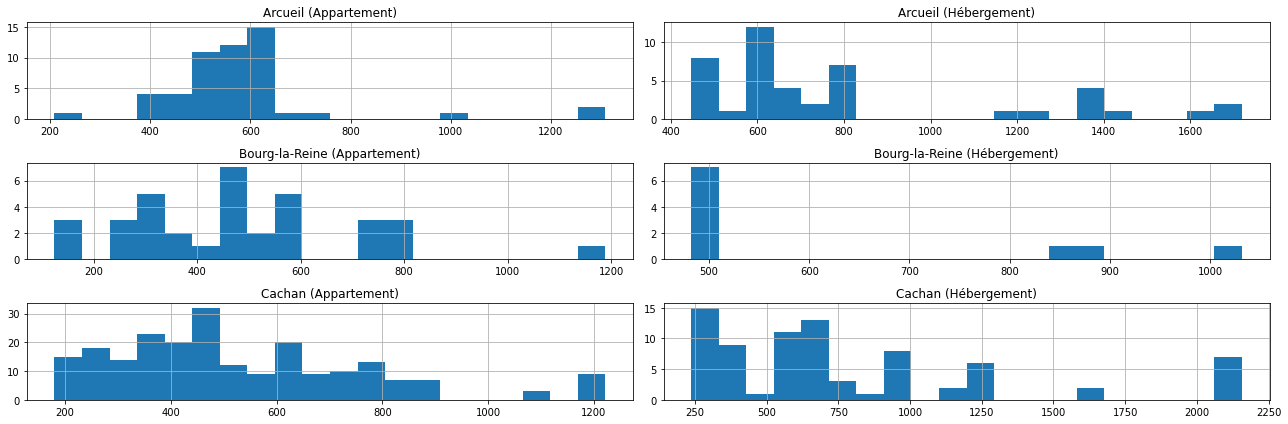

In [5]:
fig = plt.figure(figsize=(18, 6))
num_plot = 1
for ville in villes:
    vue = df[df.ville == ville]
    for type_ in ('Appartement', 'Hébergement'):
        fig.add_subplot(len(villes), 2, num_plot)
        plt.title(f'{ville} ({type_})')
        vue[vue.type == type_].prix.hist(bins=20)
        num_plot += 1
plt.tight_layout()

In [6]:
# Être nouveau augmente les prix
df.groupby('est_nouveau').prix.mean()

est_nouveau
False    604.025445
True     659.135417
Name: prix, dtype: float64

In [7]:
# Être professionnel aussi
df.groupby('est_professionnel').prix.mean()

est_professionnel
False    607.521445
True     685.369565
Name: prix, dtype: float64

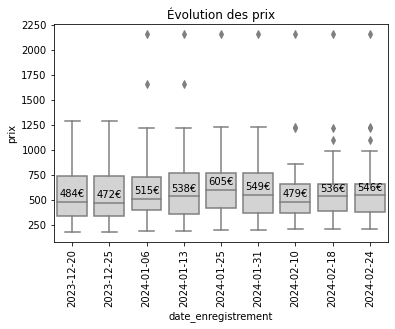

In [8]:
# Comment évoluent les prix ?
import seaborn as sns
vue = df[df.ville == 'Cachan']


sns.boxplot(x=vue.date_enregistrement, y=vue.prix, color='lightgray')
médianes = vue.groupby('date_enregistrement').prix.median()
for i, médiane in enumerate(médianes):
    plt.text(i, médiane + 50, f'{médiane:.0f}€', ha='center')
plt.xticks(rotation=90)
plt.title('Évolution des prix');

## Suivi des logements dans le temps

In [9]:
df.sample(3)

,date_enregistrement,type,ville,description,prix,note,nb_avis,nb_lits,nb_chambres,est_professionnel,est_nouveau
20,2023-12-20,Hébergement,Cachan,Summer 2023 Cheerful 3-bedroom family home,340,4.6,5.0,NaN,NaN,False,False
624,2024-01-31,Appartement,Arcueil,Appartement Cocon avec parking privé près de P...,533,5.0,6.0,NaN,NaN,False,False
816,2024-02-10,Maison de ville,Cachan,La Maison du Figuier-Direct StadeDeFrance/Airp...,728,NaN,NaN,NaN,NaN,False,False


In [10]:
pivot = df.pivot(columns=['date_enregistrement'], values='prix', index=clé)
pivot.head()

date_enregistrement                                                     2023-12-20  \
type        ville   description                                                      
Appartement Arcueil 49euros/nuit,T2 mn àpiedMaisonExamen10mnPARIS              NaN   
                    Appartement 2 pièces.                                      NaN   
                    Appartement Cocon avec parking privé près de Paris         NaN   
                    Appartement cosy                                           NaN   
                    Appartement duplex - Arcueil                             565.0   

date_enregistrement                                                     2023-12-25  \
type        ville   description                                                      
Appartement Arcueil 49euros/nuit,T2 mn àpiedMaisonExamen10mnPARIS              NaN   
                    Appartement 2 pièces.                                      NaN   
                    Appartement Cocon avec parking privé près de Paris       690.0   
                    Appartement cosy                                           NaN   
                    Appartement duplex - Arcueil                             565.0   

date_enregistrement                                                     2024-01-06  \
type        ville   description                                                      
Appartement Arcueil 49euros/nuit,T2 mn àpiedMaisonExamen10mnPARIS              NaN   
                    Appartement 2 pièces.                                      NaN   
                    Appartement Cocon avec parking privé près de Paris       558.0   
                    Appartement cosy                                           NaN   
                    Appartement duplex - Arcueil                             597.0   

date_enregistrement                                                     2024-01-13  \
type        ville   description                                                      
Appartement Arcueil 49euros/nuit,T2 mn àpiedMaisonExamen10mnPARIS              NaN   
                    Appartement 2 pièces.                                      NaN   
                    Appartement Cocon avec parking privé près de Paris         NaN   
                    Appartement cosy                                           NaN   
                    Appartement duplex - Arcueil                               NaN   

date_enregistrement                                                     2024-01-25  \
type        ville   description                                                      
Appartement Arcueil 49euros/nuit,T2 mn àpiedMaisonExamen10mnPARIS              NaN   
                    Appartement 2 pièces.                                    400.0   
                    Appartement Cocon avec parking privé près de Paris       533.0   
                    Appartement cosy                                           NaN   
                    Appartement duplex - Arcueil                             597.0   

date_enregistrement                                                     2024-01-31  \
type        ville   description                                                      
Appartement Arcueil 49euros/nuit,T2 mn àpiedMaisonExamen10mnPARIS              NaN   
                    Appartement 2 pièces.                                    400.0   
                    Appartement Cocon avec parking privé près de Paris       533.0   
                    Appartement cosy                                           NaN   
                    Appartement duplex - Arcueil                             597.0   

date_enregistrement                                                     2024-02-10  \
type        ville   description                                                      
Appartement Arcueil 49euros/nuit,T2 mn àpiedMaisonExamen10mnPARIS            209.0   
                    Appartement 2 pièces.                                    400.0   
                    Appartement Cocon 

In [19]:
def cachanais_qui_ont_lair_davoir_loué(pivot, nb=2):
    """Ils n'apparaissent plus depuis `nb` scrapings"""
    last_cols = pivot.columns[-nb:].tolist()
    cond = pivot[last_cols].isnull().sum(axis=1) == nb
    loués = pivot[cond].reset_index()
    return pd.merge(
        loués[loués.ville == 'Cachan'],
        df[clé + ['nb_chambres']],
        on=clé, how='inner'
    )
loués = cachanais_qui_ont_lair_davoir_loué(pivot)
loués

,type,ville,description,2023-12-20,2023-12-25,2024-01-06,2024-01-13,2024-01-25,2024-01-31,2024-02-10,2024-02-18,2024-02-24,nb_chambres
0,Appartement,Cachan,"49euros/nuit ,petit T2 face bus12mn PARIS",NaN,NaN,NaN,NaN,NaN,NaN,209.0,NaN,NaN,NaN
1,Appartement,Cachan,"54euros/nuit ,petit T2 face bus12mn PARIS",NaN,NaN,NaN,NaN,NaN,223.0,NaN,NaN,NaN,NaN
2,Appartement,Cachan,Appartement 6 invités à 25 min du centre de Paris,473.0,473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Appartement,Cachan,Appartement 6 invités à 25 min du centre de Paris,473.0,473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Appartement,Cachan,"Appartement 86m2, 6p, 3km Paris",494.0,494.0,526.0,526.0,526.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Villa,Cachan,Jardin fleuri tout près de Paris,916.0,916.0,831.0,831.0,831.0,NaN,NaN,NaN,NaN,NaN
85,Villa,Cachan,Maison et jardin boisé A 10 minutes de Paris !,805.0,NaN,NaN,NaN,NaN,837.0,NaN,NaN,NaN,NaN
86,Villa,Cachan,Maison et jardin boisé A 10 minutes de Paris !,805.0,NaN,NaN,NaN,NaN,837.0,NaN,NaN,NaN,NaN
87,Villa,Cachan,Un jardin tout près de Paris,NaN,NaN,NaN,NaN,NaN,767.0,NaN,NaN,NaN,NaN


In [29]:
def cachanais_qui_ont_modifié_leur_prix(pivot):
    changeurs = pivot[pivot.nunique(axis=1) > 1].reset_index()
    return changeurs
cachanais_qui_ont_modifié_leur_prix(pivot)

date_enregistrement,type,ville,description,2023-12-20,2023-12-25,2024-01-06,2024-01-13,2024-01-25,2024-01-31,2024-02-10,2024-02-18,2024-02-24
0,Appartement,Arcueil,Appartement Cocon avec parking privé près de P...,NaN,690.0,558.0,NaN,533.0,533.0,533.0,NaN,NaN
1,Appartement,Arcueil,Appartement duplex - Arcueil,565.0,565.0,597.0,NaN,597.0,597.0,597.0,597.0,NaN
2,Appartement,Arcueil,Beau T3 à Arcueil à 3 min RER B « Laplace »,NaN,573.0,447.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Appartement,Arcueil,GuestReady - Appartement Lumineux à Arcueil,NaN,NaN,NaN,NaN,503.0,NaN,NaN,490.0,NaN
4,Appartement,Arcueil,L'Essentiel : Appartement lumineux proche de tout,NaN,381.0,NaN,NaN,581.0,NaN,NaN,NaN,NaN
5,Appartement,Arcueil,Le 11-26 Yourhosthelper,548.0,548.0,555.0,NaN,NaN,NaN,NaN,NaN,NaN
6,Appartement,Arcueil,Spacieux duplex proche Paris,NaN,NaN,526.0,530.0,530.0,530.0,530.0,NaN,NaN
7,Appartement,Bourg-la-Reine,Appart. 15 min Paris/ 2 chambres,536.0,536.0,550.0,550.0,550.0,550.0,550.0,NaN,NaN
8,Appartement,Bourg-la-Reine,Appartement 2 pièces avec parking à 15mn de Paris,NaN,NaN,NaN,NaN,NaN,NaN,370.0,NaN,314.0
9,Appartement,Bourg-la-Reine,Le déclic,777.0,777.0,797.0,NaN,724.0,724.0,724.0,NaN,NaN


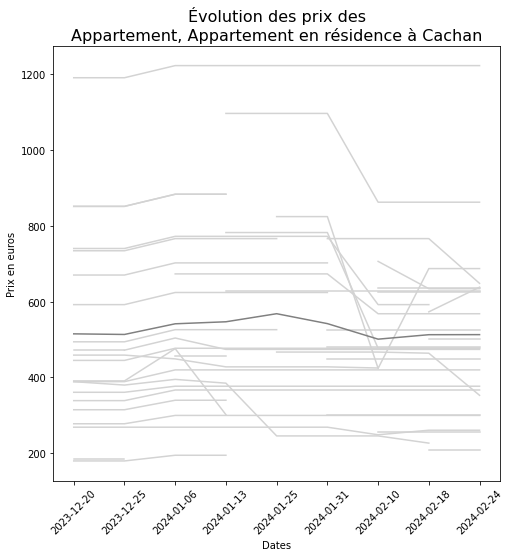

In [97]:
ville = 'Cachan'
types = ('Appartement', 'Appartement en résidence')

vue = pivot.reset_index()\
    .query(f"ville == '{ville}'")\
    .query(f"type in {types}")\
    .filter(regex='202')
cols = vue.columns

plt.figure(figsize=(8, 8))
for tup in vue.itertuples():
    y = [getattr(tup, f'_{i}') for i in range(1, len(tup))]
    plt.plot(y, color='lightgrey')
plt.plot(vue.mean().values, color='gray', label='mean')
plt.xticks(range(len(cols)), cols, rotation=45)
plt.ylabel('Prix en euros')
plt.xlabel('Dates')
plt.title(f"Évolution des prix des\n{', '.join(types)} à {ville}", fontsize=16);

## Annexes

In [122]:
# Recherche d'une clé primaire : 
variables_dynamiques = ['date_enregistrement', 'est_nouveau', 'note', 'nb_avis']
vue = df.drop(variables_dynamiques, axis=1).drop_duplicates()
vue[vue[clé].duplicated(keep=False)]

# --> les logements qui apparaissent sont ceux qui ont changé de stratégie de prix !
# --> la clé ['ville', 'type', 'description'] identifie donc un logement de façon unique

,type,ville,description,prix,nb_lits,nb_chambres,est_professionnel
41,Hébergement,Arcueil,La Maison Ensoleillée - 2 Chambres - RER B & M7,1425,NaN,NaN,False
57,Appartement,Cachan,2P a 10 min à pied du RER B,389,NaN,NaN,False
197,Appartement,Cachan,2P a 10 min à pied du RER B,380,NaN,NaN,False
239,Hébergement,Arcueil,La Maison Ensoleillée - 2 Chambres - RER B & M7,1355,NaN,NaN,False
